In [1]:

## Importing the required python libraries 
import os, sys
import warnings
import timeit
import numpy as np
import pandas as pd 
import pkg_resources
import matplotlib.pyplot as plt
import re
import seaborn as sns
from collections import defaultdict


In [2]:
pergene_files=[]
#data_dir= "../satay/data_files/data_unmerged/"
#data_dir="../transposonmapper/data_files/files4test/"
data_dir="../postprocessed-data/"
#data_dir="../transposonmapper/data_files/"
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("pergene_insertions.xlsx"):
            pergene_files.append(os.path.join(root, file))

list_data=[]
for i in pergene_files:
    list_data.append(pd.read_excel(i,engine='openpyxl',index_col="Unnamed: 0"))

keys=[]
for i in np.arange(0,len(pergene_files)):
    keys.append(pergene_files[i].split("/")[-1].split("_")[0]+"_"+pergene_files[i].split("/")[-1].split("_")[1])

list_data_pd=pd.concat(list_data,axis=0,keys=keys)

In [5]:
list_data_pd.head()

Gene name Chromosome  Start location  End location  \
dbem3_b 0    YAL069W          I             335           649   
        1  YAL068W-A          I             538           792   
        2       PAU8          I            1807          2169   
        3  YAL067W-A          I            2480          2707   
        4       SEO1          I            7235          9016   

                                         Insertion locations  \
dbem3_b 0  [336, 340, 349, 372, 377, 382, 386, 386, 387, ...   
        1  [559, 561, 564, 565, 569, 570, 570, 571, 573, ...   
        2  [1810, 1819, 1826, 1831, 1833, 1838, 1846, 188...   
        3  [2494, 2534, 2552, 2560, 2561, 2561, 2574, 257...   
        4  [7294, 7299, 7326, 7403, 7403, 7404, 7408, 744...   

                                Reads per insertion location  Reads  \
dbem3_b 0  [3, 327, 87, 1, 3, 12, 39, 1, 43, 6, 3, 45, 1,...   2353   
        1  [6, 1, 2, 2, 147, 9, 154, 17, 177, 1, 132, 5, ...    694   
        2  [3, 30, 16, 2, 8, 1, 12, 50, 1, 3, 2, 1, 44, 2...    416   
        3  [20, 1, 7, 6, 8, 1, 4, 4, 2, 21, 2, 1, 3, 4, 4...     90   
        4  [38, 1, 1, 84, 1, 12, 32, 1, 3, 5, 1, 6, 52, 4...   1394   

           Insertions  
dbem3_b 0          55  
        1          25  
        2          29  
        3          17  
        4          70

In [ ]:
## Plot reads per tranposons over the genes in essential genes  

essential_genes=["CDC42","ACT1","CDC24", "CDC19","CDC15"]

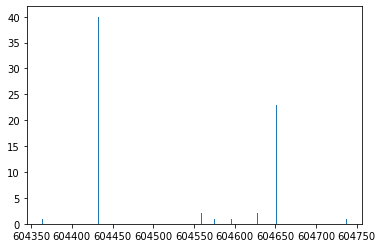

In [36]:
 ## prototype for one gene
from from_excel_to_list import from_excel_to_list

a=list_data_pd.loc[keys[0],"Gene name"]

np.where(a=="CDC42")[0][0]

plt.bar(from_excel_to_list( list_data_pd.loc[keys[0],"Insertion locations"][4292]),
from_excel_to_list( list_data_pd.loc[keys[0],"Reads per insertion location"][4292]))

length=list_data_pd.loc[keys[0],"End location"][4292]-list_data_pd.loc[keys[0],"Start location"][4292]

length_10_first=0.1*length
length_10_last=0.9*length

#plt.vlines(ymax=10,ymin=0,x=604350+length_10_first,color="red")
#plt.vlines(ymax=10,ymin=0,x=604350+length_10_last,color="red")

#plt.xlim(604330,604750)

In [ ]:
## Make subplots for all genes showing the reads distribution along the gene 

    ## highlight the first 10% of the gene and the last 10% of the gene in the plot 